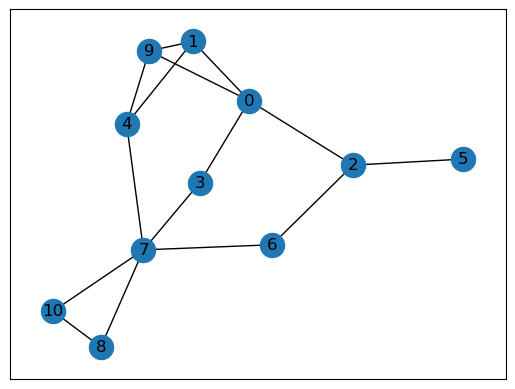

tensor([[ 0.,  0.,  1., -1., -1.],
        [ 1.,  0.,  1., -1., -1.],
        [ 3.,  0.,  1., -1., -1.],
        [ 4.,  0.,  1., -1., -1.],
        [ 5.,  0.,  1., -1., -1.],
        [ 2.,  0.,  1., -1., -1.],
        [ 6.,  0.,  1., -1., -1.],
        [ 7.,  0.,  1., -1., -1.],
        [ 8.,  0.,  1., -1., -1.],
        [-1.,  1.,  0.,  1., -1.],
        [-2.,  1.,  0.,  8., -1.]]) tensor([[ 1.0000,  0.0000],
        [ 0.3750,  1.0000],
        [ 0.6250,  2.0000],
        [ 1.0000, -1.0000],
        [ 1.0000,  0.0000],
        [ 0.3750,  1.0000],
        [ 0.0000, -1.0000],
        [ 0.3750,  0.0000],
        [ 0.5000,  1.0000],
        [ 0.3750,  2.0000],
        [ 0.6250,  0.0000],
        [ 0.6250,  1.0000],
        [ 0.3750,  0.0000],
        [ 0.3750,  1.0000],
        [ 0.3750, -1.0000],
        [ 0.5000,  0.0000],
        [ 0.3750,  0.0000],
        [ 1.0000,  1.0000],
        [ 0.6250,  0.0000],
        [ 0.3750,  1.0000],
        [ 1.0000,  2.0000],
        [ 0.5000,  3.0000]

ValueError: Invalid action 3 for agent agent_1

In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph
from patrolling_zoo.env.communication_model import CommunicationModel
import numpy as np
import networkx as nx
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

patrolGraph = PatrolGraph("patrolling_zoo/env/9nodes.graph")
env = parallel_env(patrolGraph, 2,
                   speed = 10.0,
                   observation_radius=100,
                   observe_method="pyg",
                   observe_bitmap_dims = (40, 40),
                   require_explicit_visit=True,
                   action_method="neighbors"
)

# observations, infos = env.reset(seed=42)

obs = env.observe(env.agents[0])[2]

g = to_networkx(obs, to_undirected=True)
nx.draw_networkx(g)
plt.show()
print(obs.x, obs.edge_attr, obs.edge_index, obs.agent_mask)

for i in range(3):
    # actions = {agent: np.random.choice(len(env.pg.graph.nodes)) for agent in env.agents}
    actions = {
        env.agents[0]: 0,
        env.agents[1]: np.random.choice(len(env.pg.graph.nodes))

    }
    print(f"TAKING ACTIONS: {actions}")
    env.step(actions)

print(f"AGENT 0 OBSERVATION: {env.observe(env.agents[0])}")
obs = env.observe(env.agents[0])[2]
g = to_networkx(obs, to_undirected=True)
nx.draw_networkx(g)
plt.show()
print(obs.x, obs.edge_attr, obs.edge_index, obs.agent_mask)

# print(observations)
# nx.draw_networkx(patrolGraph.graph)
# # Display the env.state() bitmap using matplotlib.
# import matplotlib.pyplot as plt
# import numpy as np

# state = env.state()
# bitmap = state

# graphLayer = bitmap[:,:,2]
# graphNodes = graphLayer[np.where(graphLayer >= 0)]
# print(f"Sum of node layer: {np.sum(graphNodes)}")
# print(f"Expected sum of node layer: {sum(list(range(len(patrolGraph.graph.nodes))))}")

# agentLayer = bitmap[:,:,0]
# agents = agentLayer[np.where(agentLayer >= 0)]

# bitmap = env._minMaxNormalize(bitmap, a=0, b=255)
# bitmap[np.where(graphLayer >= 0)] = 255
# bitmap[np.where(agentLayer >= 0)] = 0
# plt.imshow(bitmap, aspect="equal")

In [3]:
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph
from patrolling_zoo.env.communication_model import CommunicationModel
import numpy as np
import networkx as nx
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

patrolGraph = PatrolGraph("patrolling_zoo/env/9nodes.graph")
env = parallel_env(patrolGraph, 2,
                   speed = 10.0,
                   observation_radius=100,
                   observe_method="pyg",
                   observe_bitmap_dims = (40, 40),
                   require_explicit_visit=True,
                   action_method="neighbors"
)
env.reset()
print(f"Node IDs: {nx.get_node_attributes(env.pg.graph, 'id')}")
env.reset()
print(f"Node IDs: {nx.get_node_attributes(env.pg.graph, 'id')}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


AttributeError: 'Graph' object has no attribute 'get_node_attributes'

In [4]:
bitmap = env.observe(env.agents[0], radius=200)

graphLayer = bitmap[:,:,2]
graphNodes = graphLayer[np.where(graphLayer >= 0)]
print(f"Sum of node layer: {np.sum(graphNodes)}")
print(f"Expected sum of node layer: {sum(list(range(len(patrolGraph.graph.nodes))))}")

agentLayer = bitmap[:,:,0]
agents = agentLayer[np.where(agentLayer >= 0)]

bitmap = env._minMaxNormalize(bitmap, a=0, b=255)
bitmap[np.where(graphLayer >= 0)] = 255
bitmap[np.where(agentLayer >= 0)] = 0
plt.imshow(bitmap, aspect="equal")

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{<patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7ff360441b70>: {'ready': True}, <patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7ff360440790>: {'ready': True}}
Agent <patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7ff360441b70> state belief: {0: -1.0, 1: -1.0, 2: -1.0, 3: -1.0, 4: -1.0, 5: 0.0, 6: -1.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: -1.0, 12: 0.0, 13: -1.0, 14: -1.0, 15: -1.0, 16: -1.0, 17: -1.0, 18: -1.0, 19: -1.0, 20: -1.0, 21: -1.0, 22: -1.0, 23: -1.0, 24: -1.0, 25: -1.0, 26: -1.0, 27: -1.0, 28: -1.0, 29: -1.0, 30: -1.0, 31: -1.0, 32: -1.0, 33: -1.0, 34: -1.0, 35: -1.0, 36: -1.0, 37: -1.0, 38: -1.0, 39: -1.0, 40: -1.0, 41: -1.0, 42: -1.0, 43: -1.0, 44: -1.0, 45: -1.0, 46: -1.0, 47: -1.0, 48: -1.0, 49: -1.0}
Agent <patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7ff360440790> state belief: {0: -1.0, 1: -1.0, 2: -1.0, 3: -1.0, 4: -1.0, 5: -1.0, 6: 

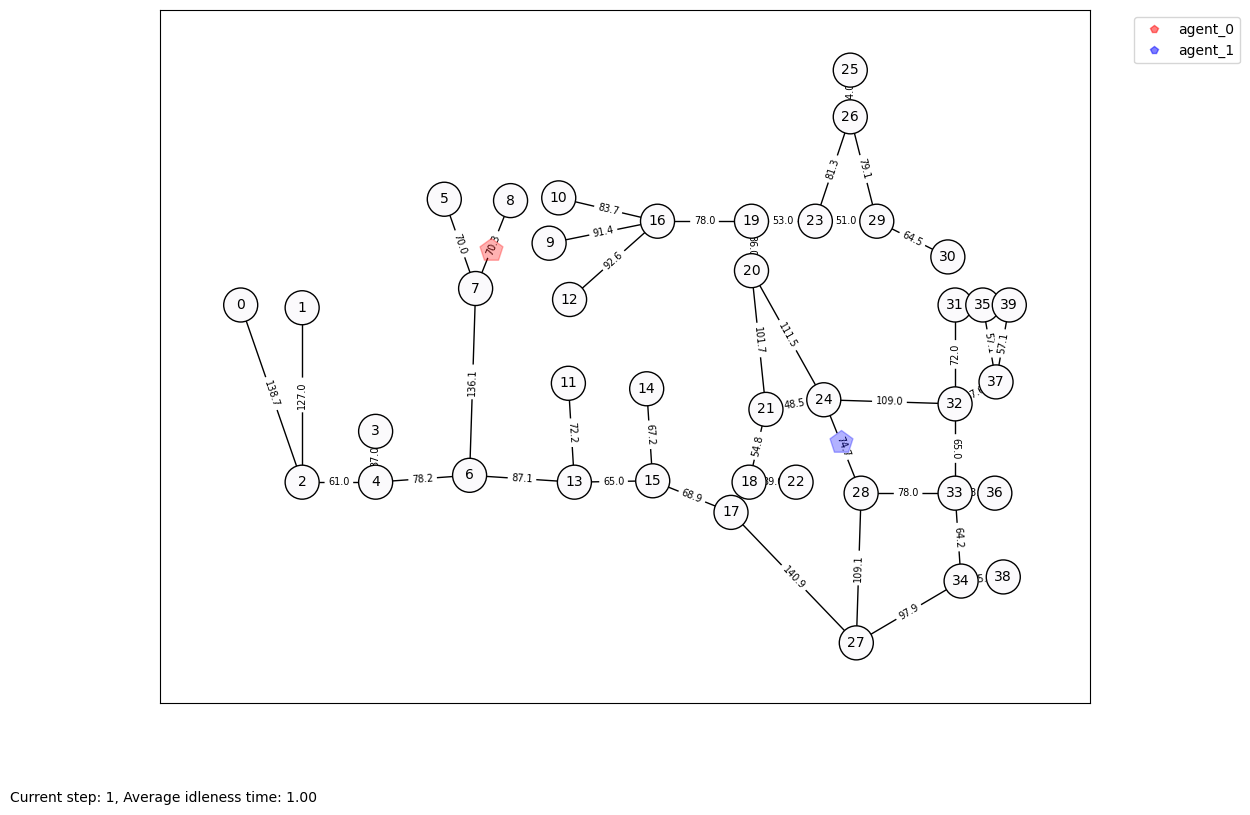

Agent <patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7ff360441b70> state belief: {0: -1.0, 1: -1.0, 2: -1.0, 3: -1.0, 4: -1.0, 5: 0.0, 6: -1.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: -1.0, 14: -1.0, 15: -1.0, 16: -1.0, 17: -1.0, 18: -1.0, 19: -1.0, 20: -1.0, 21: -1.0, 22: -1.0, 23: -1.0, 24: -1.0, 25: -1.0, 26: -1.0, 27: -1.0, 28: -1.0, 29: -1.0, 30: -1.0, 31: -1.0, 32: -1.0, 33: -1.0, 34: -1.0, 35: -1.0, 36: -1.0, 37: -1.0, 38: -1.0, 39: -1.0, 40: -1.0, 41: -1.0, 42: -1.0, 43: -1.0, 44: -1.0, 45: -1.0, 46: -1.0, 47: -1.0, 48: -1.0, 49: -1.0}
Agent <patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7ff360440790> state belief: {0: -1.0, 1: -1.0, 2: -1.0, 3: -1.0, 4: -1.0, 5: -1.0, 6: -1.0, 7: -1.0, 8: -1.0, 9: -1.0, 10: -1.0, 11: -1.0, 12: -1.0, 13: -1.0, 14: -1.0, 15: -1.0, 16: -1.0, 17: -1.0, 18: 0.0, 19: -1.0, 20: -1.0, 21: 0.0, 22: 0.0, 23: -1.0, 24: 0.0, 25: -1.0, 26: -1.0, 27: -1.0, 28: 0.0, 29: -1.0, 30: -1.0, 31: -1.0, 32: 0.0, 33: 0.0, 34: -1

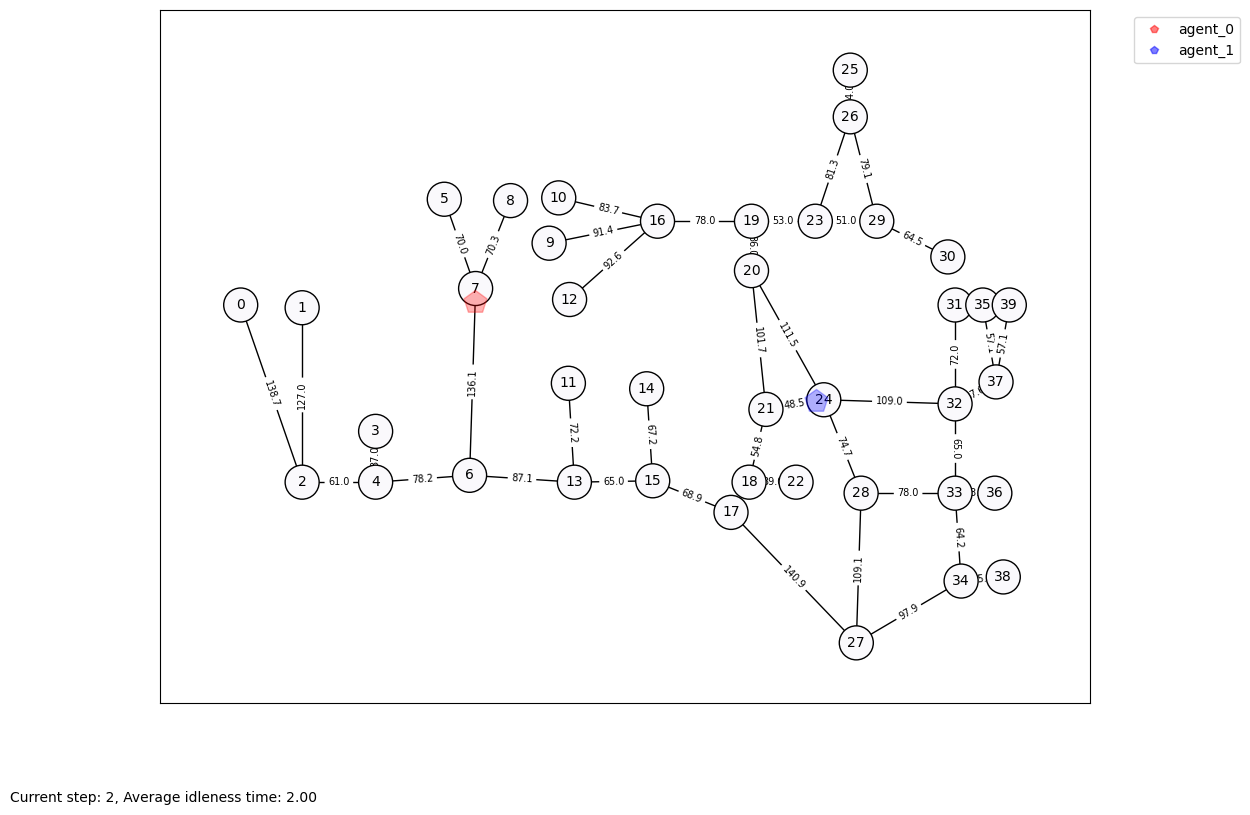

Agent <patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7ff360441b70> state belief: {0: -1.0, 1: -1.0, 2: -1.0, 3: 0.0, 4: -1.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: -1.0, 14: -1.0, 15: -1.0, 16: -1.0, 17: -1.0, 18: -1.0, 19: -1.0, 20: -1.0, 21: -1.0, 22: -1.0, 23: -1.0, 24: -1.0, 25: -1.0, 26: -1.0, 27: -1.0, 28: -1.0, 29: -1.0, 30: -1.0, 31: -1.0, 32: -1.0, 33: -1.0, 34: -1.0, 35: -1.0, 36: -1.0, 37: -1.0, 38: -1.0, 39: -1.0, 40: -1.0, 41: -1.0, 42: -1.0, 43: -1.0, 44: -1.0, 45: -1.0, 46: -1.0, 47: -1.0, 48: -1.0, 49: -1.0}
Agent <patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7ff360440790> state belief: {0: -1.0, 1: -1.0, 2: -1.0, 3: -1.0, 4: -1.0, 5: -1.0, 6: -1.0, 7: -1.0, 8: -1.0, 9: -1.0, 10: -1.0, 11: -1.0, 12: -1.0, 13: -1.0, 14: -1.0, 15: -1.0, 16: -1.0, 17: 0.0, 18: 0.0, 19: -1.0, 20: -1.0, 21: 0.0, 22: 0.0, 23: -1.0, 24: 0.0, 25: -1.0, 26: -1.0, 27: -1.0, 28: 0.0, 29: -1.0, 30: -1.0, 31: -1.0, 32: 0.0, 33: 0.0, 34: -1.0,

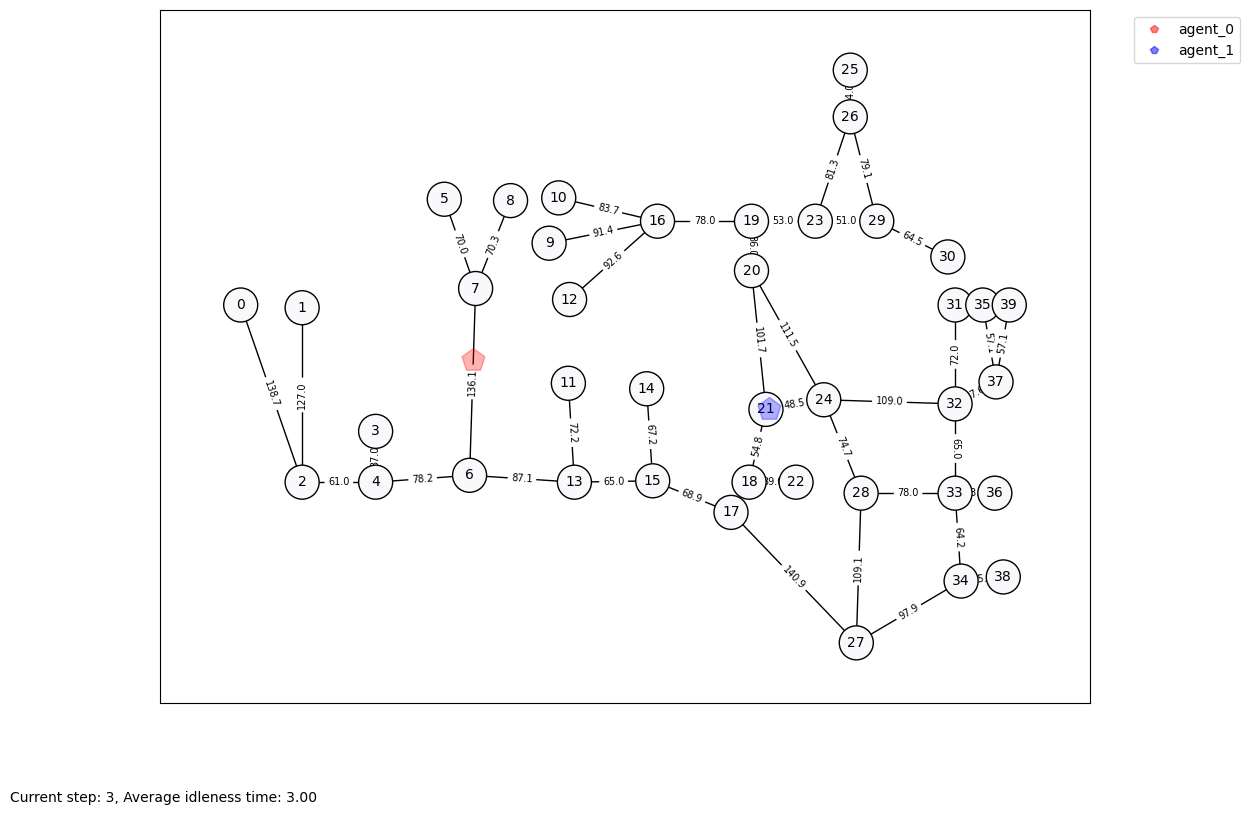

Agent <patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7ff360441b70> state belief: {0: -1.0, 1: -1.0, 2: -1.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: -1.0, 15: -1.0, 16: -1.0, 17: -1.0, 18: -1.0, 19: -1.0, 20: -1.0, 21: -1.0, 22: -1.0, 23: -1.0, 24: -1.0, 25: -1.0, 26: -1.0, 27: -1.0, 28: -1.0, 29: -1.0, 30: -1.0, 31: -1.0, 32: -1.0, 33: -1.0, 34: -1.0, 35: -1.0, 36: -1.0, 37: -1.0, 38: -1.0, 39: -1.0, 40: -1.0, 41: -1.0, 42: -1.0, 43: -1.0, 44: -1.0, 45: -1.0, 46: -1.0, 47: -1.0, 48: -1.0, 49: -1.0}
Agent <patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7ff360440790> state belief: {0: -1.0, 1: -1.0, 2: -1.0, 3: -1.0, 4: -1.0, 5: -1.0, 6: -1.0, 7: -1.0, 8: -1.0, 9: -1.0, 10: -1.0, 11: -1.0, 12: -1.0, 13: -1.0, 14: -1.0, 15: 0.0, 16: -1.0, 17: 0.0, 18: 0.0, 19: -1.0, 20: -1.0, 21: 0.0, 22: 0.0, 23: -1.0, 24: 0.0, 25: -1.0, 26: -1.0, 27: -1.0, 28: 0.0, 29: -1.0, 30: -1.0, 31: -1.0, 32: 0.0, 33: 0.0, 34: -1.0, 35

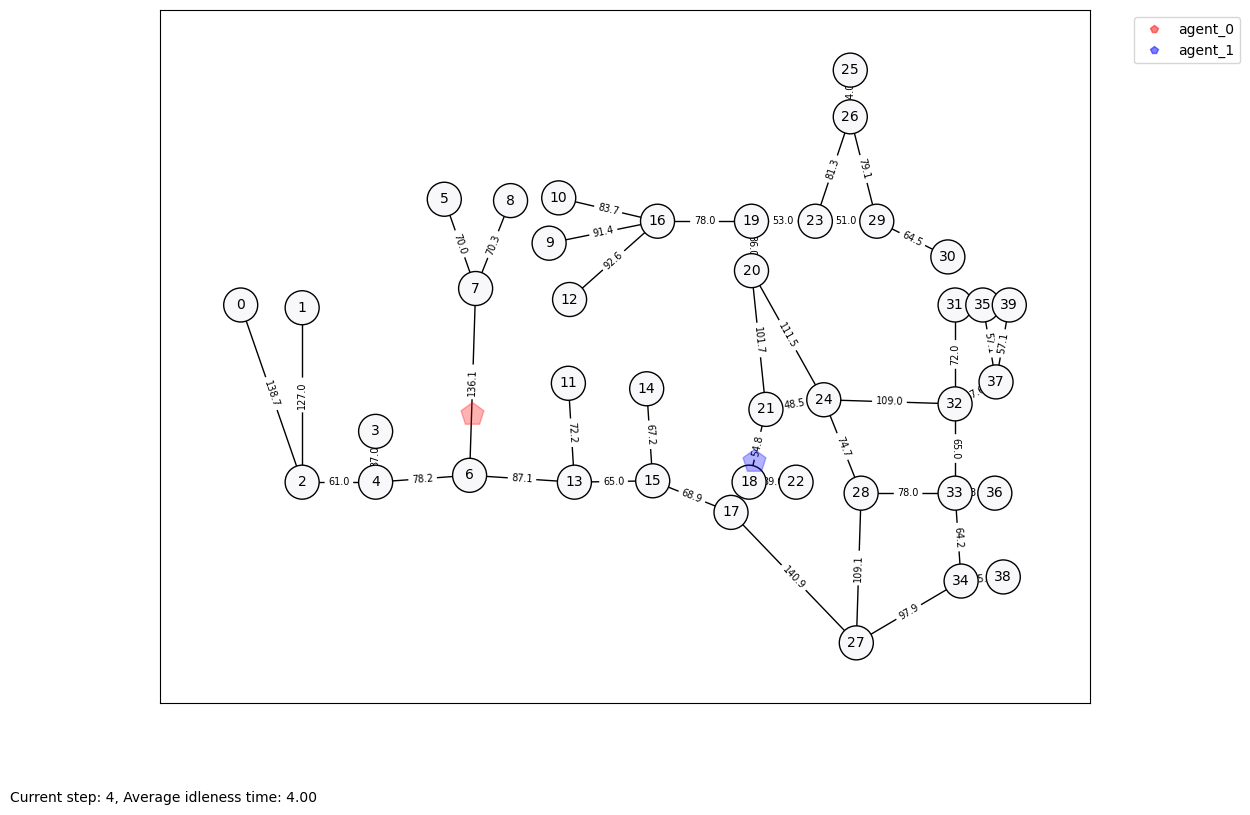

Agent <patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7ff360441b70> state belief: {0: -1.0, 1: -1.0, 2: -1.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: -1.0, 15: -1.0, 16: -1.0, 17: -1.0, 18: -1.0, 19: -1.0, 20: -1.0, 21: -1.0, 22: -1.0, 23: -1.0, 24: -1.0, 25: -1.0, 26: -1.0, 27: -1.0, 28: -1.0, 29: -1.0, 30: -1.0, 31: -1.0, 32: -1.0, 33: -1.0, 34: -1.0, 35: -1.0, 36: -1.0, 37: -1.0, 38: -1.0, 39: -1.0, 40: -1.0, 41: -1.0, 42: -1.0, 43: -1.0, 44: -1.0, 45: -1.0, 46: -1.0, 47: -1.0, 48: -1.0, 49: -1.0}
Agent <patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7ff360440790> state belief: {0: -1.0, 1: -1.0, 2: -1.0, 3: -1.0, 4: -1.0, 5: -1.0, 6: -1.0, 7: -1.0, 8: -1.0, 9: -1.0, 10: -1.0, 11: -1.0, 12: -1.0, 13: -1.0, 14: -1.0, 15: 0.0, 16: -1.0, 17: 0.0, 18: 0.0, 19: -1.0, 20: -1.0, 21: 0.0, 22: 0.0, 23: -1.0, 24: 0.0, 25: -1.0, 26: -1.0, 27: -1.0, 28: 0.0, 29: -1.0, 30: -1.0, 31: -1.0, 32: 0.0, 33: 0.0, 34: -1.0, 35

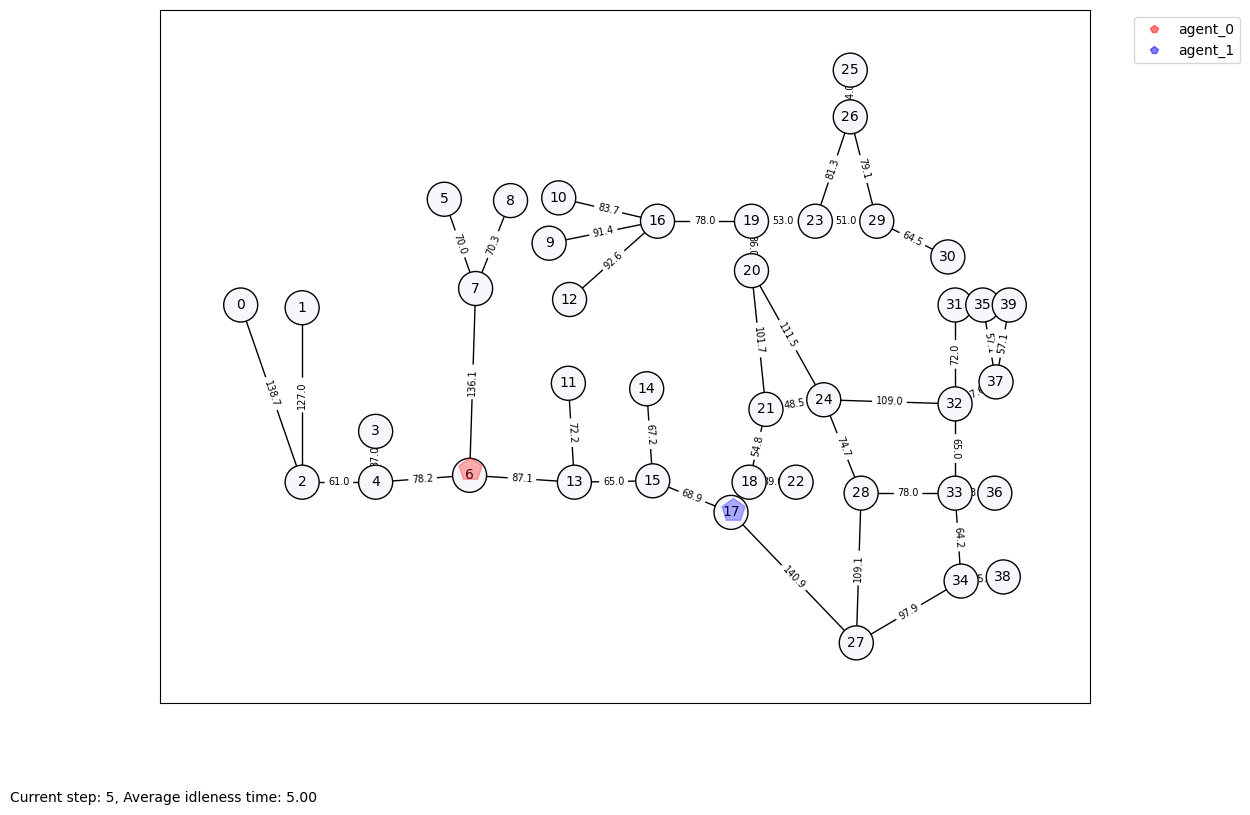

In [9]:
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph
from patrolling_zoo.env.communication_model import CommunicationModel

patrolGraph = PatrolGraph("patrolling_zoo/env/cumberland.graph")
env = parallel_env(patrolGraph, 2,
                   speed = 40.0,
                   observation_radius = 100,
                   comms_model = CommunicationModel("bernoulli", p=0.0),
                   observe_method="pyg",
                   require_explicit_visit=True
)

observations, infos = env.reset(seed=100)

print(infos)

# We temporarily fix the actions to a single node visit for each agent.
# actions = {agent: env.action_space(agent).sample() for agent in env.agents}
actions = {agent: 6 for agent in env.agents}

i = 0
while env.agents:
    # this is where you would insert your policy
    # actions = {agent: env.action_space(agent).sample() for agent in env.agents}
    
    observations, rewards, terminations, truncations, infos = env.step(actions)

    for a in env.agents:
        print(f"Agent {a} state belief: {a.stateBelief}")

    # clear_output(wait=True)
    env.render()

    # actions = {agent: 0 for agent in env.agents}
    i += 1
    if i >= 5:
        break
env.close()

In [ ]:
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph

patrolGraph = PatrolGraph("patrolling_zoo/env/cumberland.graph")

pygGraph = patrolGraph.getPyTorchGeometricGraph()
print(pygGraph)
print(f"Graph has {pygGraph.num_nodes} nodes.")
print(pygGraph.get_tensor_size())